# Лабораторная работа по заданию №  2. Алгоритмы безусловной нелинейной оптимизации. Прямые методы

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize, brute, fmin

## I. 

### Математические функции

In [89]:
# x^3
def first(x):
    return x**3

# |𝑥 − 0,2|
def second(x):
    return abs(x-0.2)

#𝑥 𝑠𝑖𝑛 1/𝑥
def third(x):
    return x*math.sin(1/x)  


### Методы поиска 𝑥: 𝑓(𝑥) → 𝑚𝑖𝑛 

In [90]:
def iteration(a, b, eps, func):
    args = np.arange(a,b,eps)
    iterations=0
    x=args[0]
    value=func(x)
    func_iter=1
    i = 1
    while i < np.size(args):
        if(func(args[i-1])<value):
            x = args[i-1] 
            value = func(args[i-1])
            func_iter+=1
        i=i+1
        iterations+=1
    return x, func(x), iterations, func_iter

def dyhotomy(a,b, eps, func):
    mid = (a+b)/2
    iterations=0
    func_iter=0
    while abs(func(b)-func(a)) > eps:
        func_iter+=2
        if func(a)>func(mid):
            a=mid
            mid=(a+b)/2### Математические функции
        elif func(b)>func(mid):
            b=mid
            mid=(a+b)/2
        iterations+=1
    if func(a)>func(mid):
        a=mid
        mid=(a+b)/2
    elif func(b)>func(mid):
        b=mid
        mid=(a+b)/2
    iterations+=1
    func_iter+=1
    return mid, func(mid), iterations, func_iter

def goldenSectionSearch(a, b, eps, func):
    phi = (1 + pow(5, 1/2)) / 2
    resphi = 2 - phi
    x1 = a + resphi * (b - a)
    x2 = b - resphi * (b - a)
    f1 = func(x1)
    f2 = func(x2)
    iterations=0
    func_iter=2
    while abs(b - a) > eps:
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + resphi * (b - a)
            f1 = func(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b - resphi * (b - a)
            f2 = func(x2)
        iterations+=1
        func_iter+=1
    if f1 < f2:
        b = x2
        x2 = x1
        f2 = f1
        x1 = a + resphi * (b - a)
        f1 = func(x1)
    else:
        a = x1
        x1 = x2
        f1 = f2
        x2 = b - resphi * (b - a)
        f2 = func(x2)
    x=(x1 + x2) / 2
    iterations+=1
    func_iter+=1
    return x, func(x), iterations, func_iter

### Вывод результатов

In [92]:
print('Метод итераций:')
print(iteration(0, 1.001, 0.001, first))
print(iteration(0, 1.001, 0.001, second))
print(iteration(0.01, 1.001, 0.001, third))
print('\nМетод дихотомии:')
print(dyhotomy(0, 1, 0.001, first))
print(dyhotomy(0, 1, 0.001, second))
print(dyhotomy(0.01, 1, 0.001, third))
print('\nМетод золотого сечения:')
print(goldenSectionSearch(0, 1, 0.001, first))
print(goldenSectionSearch(0, 1, 0.001, second))
print(goldenSectionSearch(0.01, 1, 0.001, third))

Метод итераций:
(0.0, 0.0, 1000, 1)
(0.2, 0.0, 1000, 201)
(0.22299999999999984, -0.21722461258083448, 990, 69)

Метод дихотомии:
(0.015625, 3.814697265625e-06, 5, 9)
(0.250244140625, 0.05024414062499999, 11, 21)
(0.25756042480468755, -0.17385836147520317, 13, 25)

Метод золотого сечения:
(0.00022655192689241074, 1.1627953356593818e-11, 16, 18)
(0.1999332969525494, 6.67030474506003e-05, 16, 18)
(0.22258097699647733, -0.21723358052922428, 16, 18)


## II. 

In [10]:
a=np.random.random()
b=np.random.random()
x_array=[]
y_array=[]

def lin_approx(x, a, b):
    return a*x+b
def rat_approx(x, a, b):
    return a/(1+b*x)
def main_func(x):
    sigma=np.random.normal()
    y=a*x+b+sigma
    return y

def sq_function_lin(params):
    a, b=params
    summ=0
    for i in range (100):
        summ=summ+(lin_approx(x_array[i], a, b)-y_array[i])**2
    return summ

def sq_function_rat(params):
    a, b=params
    summ=0
    for i in range (100):
        summ=summ+(rat_approx(x_array[i], a, b)-y_array[i])**2
    return summ

for i in range (100):    
    x=i/100
    y=main_func(x)
    
    x_array.append(x)
    y_array.append(y)

Optimization terminated successfully.
         Current function value: 97.004500
         Iterations: 126
         Function evaluations: 257
[ 0.23799565 -0.89288215]
[0.67631745 1.10820473]


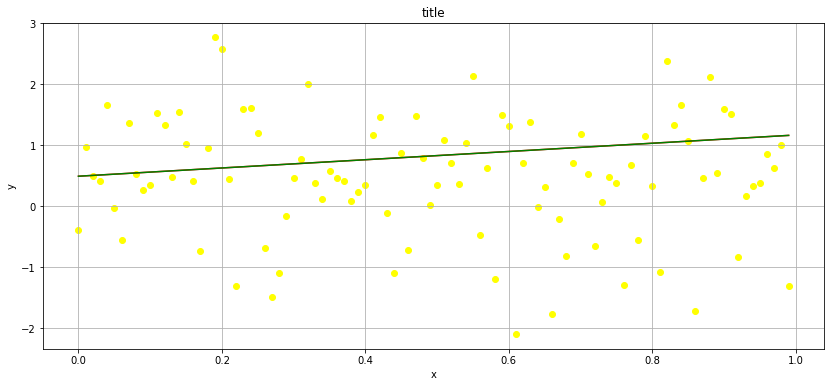

In [17]:
#Рациональная аппроксимация с минимизацией методом Нелдера-Мида 
params=[0.5, 0.1]
res = minimize(sq_function_rat, params,  method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})
nm_rat=res.x
nm_rat_approx_array=[nm_rat[0]*x+b for x in x_array]
print(a_b_rat)

#Рациональная аппроксимация с минимизацией методом перебора 
rranges = (slice(0, 1, 0.01), slice(0, 1, 0.01))
bf_rat=brute(sq_function_rat, rranges, finish=fmin)
bf_rat_approx_array=[bf_rat[0]*x+b for x in x_array]
print(bf_rat)

plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
ax.plot(x_array, nm_rat_approx_array, color='red')
ax.plot(x_array, bf_rat_approx_array, color='green')
ax.scatter(x_array, y_array, color='yellow')
ax.set(xlabel='x', ylabel='y',title='title')
ax.grid()
plt.show()

Optimization terminated successfully.
         Current function value: 97.167904
         Iterations: 67
         Function evaluations: 129
[0.87874589 0.19133724]
[-0.30288531  0.60760951]


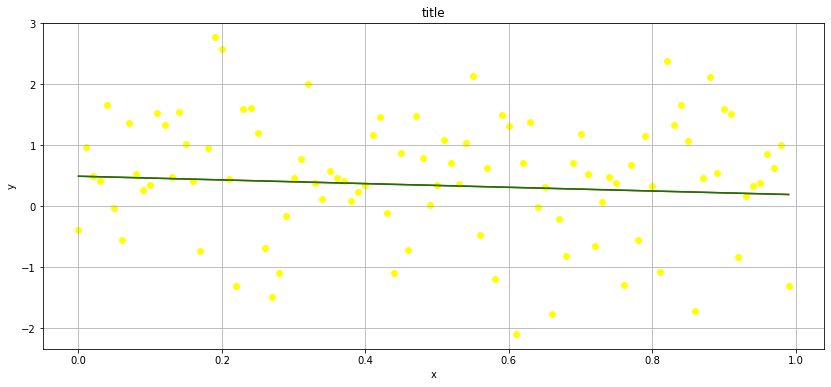

In [18]:
#Линейная аппроксимация с минимизацией методом Нелдера-Мида    
params=[0.5, 0.1]
res = minimize(sq_function_lin, params,  method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})
nm_lin=res.x
nm_lin_approx_array=[nm_lin[0]*x+b for x in x_array]
print(a_b_lin)

#Линейная аппроксимация с минимизацией методом перебора 
rranges = (slice(0, 1, 0.01), slice(0, 1, 0.01))
bf_lin=brute(sq_function_lin, rranges, finish=fmin)
bf_lin_approx_array=[bf_lin[0]*x+b for x in x_array]
print(bf_lin)

plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
ax.plot(x_array, nm_lin_approx_array, color='red')
ax.plot(x_array, bf_lin_approx_array, color='green')
ax.scatter(x_array, y_array, color='yellow')
ax.set(xlabel='x', ylabel='y',title='title')
ax.grid()
plt.show()